# IMPORT LIBRARY 

In [1]:
#IN THIS WE ARE IMPORTING LIBRARY

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,r2_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# LOADING DATASET FROM DESKTOP 

In [2]:
#IN THIS WE ARE IMPORTING DATA FROM DEKSTOP AND READING WITH THE HELP OF READ_CSV

df=pd.read_csv(r"D:\KAGGLE DATASET\BRAIN_STROKE\train.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#WE ARE TRYING TO KNOW ABOUT ROWS AND COLUMNS OF THE DATASET 

df.shape

(5110, 12)

# DESCRIPTIVE 

In [4]:
#IN THIS WE ARE TRYING TO KNOW ABOUT DATA TYPES 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# IN THIS WE ARE TRYING TO KNOW ABOUT STATISTIC OF DATA LIKE MEAN,MEDIAN ETC

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# IN THIS WE ARE TRYING TO KNNOW ABOUT THE UNIQUE VALUE OF COLUMNS

for i in df.columns:
    print(i,df[i].unique())
    print("==================================================================================================================")

id [ 9046 51676 31112 ... 19723 37544 44679]
gender ['Male' 'Female' 'Other']
age [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e

In [7]:
# IN THIS WE ARE FINDING THE WEITAGE OF THE VALUE IN EVERY COLUMNS

for i in df.columns:
    print(i,end="\n")
    print(df[i].value_counts(normalize=True))
    print("==================================================================================================================")

id
49152    0.000196
21785    0.000196
25982    0.000196
5500     0.000196
28027    0.000196
           ...   
45759    0.000196
4795     0.000196
47802    0.000196
49849    0.000196
16380    0.000196
Name: id, Length: 5110, dtype: float64
gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64
age
78.00    0.019961
57.00    0.018591
52.00    0.017613
54.00    0.017025
51.00    0.016830
           ...   
0.48     0.000587
1.40     0.000587
0.16     0.000587
0.08     0.000391
0.40     0.000391
Name: age, Length: 104, dtype: float64
hypertension
0    0.902544
1    0.097456
Name: hypertension, dtype: float64
heart_disease
0    0.945988
1    0.054012
Name: heart_disease, dtype: float64
ever_married
Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64
work_type
Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64
Residence_type
Urban

In [8]:
#IN THIS WE ARE DOING THE DATA CLEARNING SO FIRSTLY WE ARE CHECKING THE MISSING VALUE

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

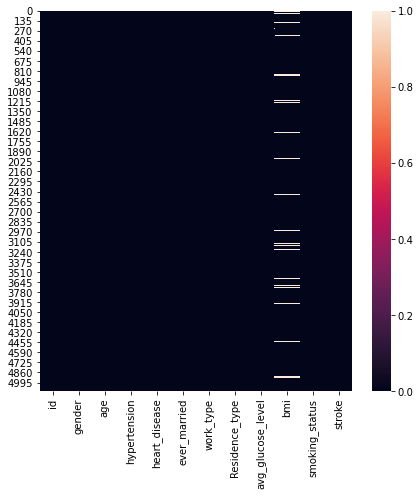

In [9]:
#IN THIS WE ARE SEEING THE NULL VALUE IN THE FORM OF DAIGRAM 

plt.figure(figsize=(7,7))
sns.heatmap(df.isnull())
plt.show()

SO AS WE ARE SEEING THERE IS ONLY ONE COLUMN THAT HAVE MISSING VALUE THAT IS BMI

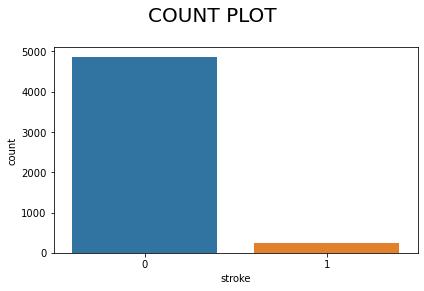

In [10]:
#IN THIS WE ARE CHECKING THE TARGET VALUE DISTRIBUTION 

plt.suptitle("COUNT PLOT", fontsize=20, x=0.5, y=1)
sns.countplot(df['stroke'])
plt.tight_layout()

AS WE ARE SEEING IN THE DAIGRAM OUR DATA IS BAISED

# DATA PREPROCESSING

In [11]:
# NOW WE ARE FILLING THE VALUE WITH MEAN

df['bmi']=df['bmi'].fillna(df.bmi.median())

<AxesSubplot:>

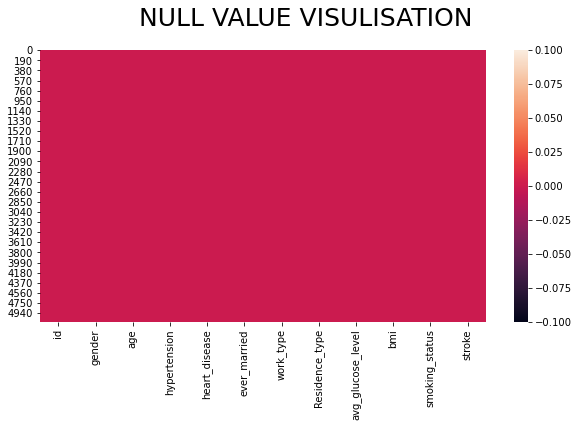

In [12]:
# IN THIS WE ARE CHECKING THAT IS THERE ANY MISSING VALUE IS PRESENT IN OUR DATASET

plt.figure(figsize=(10,5))
plt.suptitle("NULL VALUE VISULISATION ", fontsize=25, x=0.5, y=1)
sns.heatmap(df.isnull())

NOW AS WE SEEING IN OUR ABOVE FIGURE NOW WE DONT HAVE ANY MISSING VALUE 

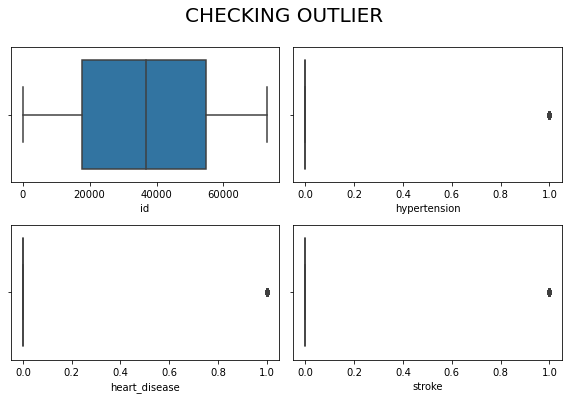

In [13]:
#IN THIS WE ARE CHECKING OUTLIER WITH THE HELP OF BOCPLOT 

list1=[item for item in df.columns if df[item].dtypes=='int64']
plt.figure(figsize=(8,10))
for i,column in enumerate(list1):
    plt.subplot(len(list1), 2, i+1)
    plt.suptitle("CHECKING OUTLIER", fontsize=20, x=0.5, y=1)
    sns.boxplot(df[column])
    plt.tight_layout()

IN THIS WE ARE SEEING IN OUR DATA THERE IS NO OUTLIER 

# DATA LABELING

In [14]:
#IN THIS SHELL WE ARE CONVERTING THE CATEGORIAL DATA INTO NUMBERICAL WITH THE HELP LABEL EMCODER

list1=[item for item in df.columns if df[item].dtypes=='object']
le=LabelEncoder()
for i in list1:
    df[i]=le.fit_transform(df[i])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


AS WE ARE SEEING THE TABLE WE LABELING THE DATA FROM STRING TO INT

In [15]:
#COVERTING FLOAT TO INT 

df['age'].astype('int')

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int32

# DAIGNOSIS ANALYSIS OR DATA VISUALISATION 

<AxesSubplot:>

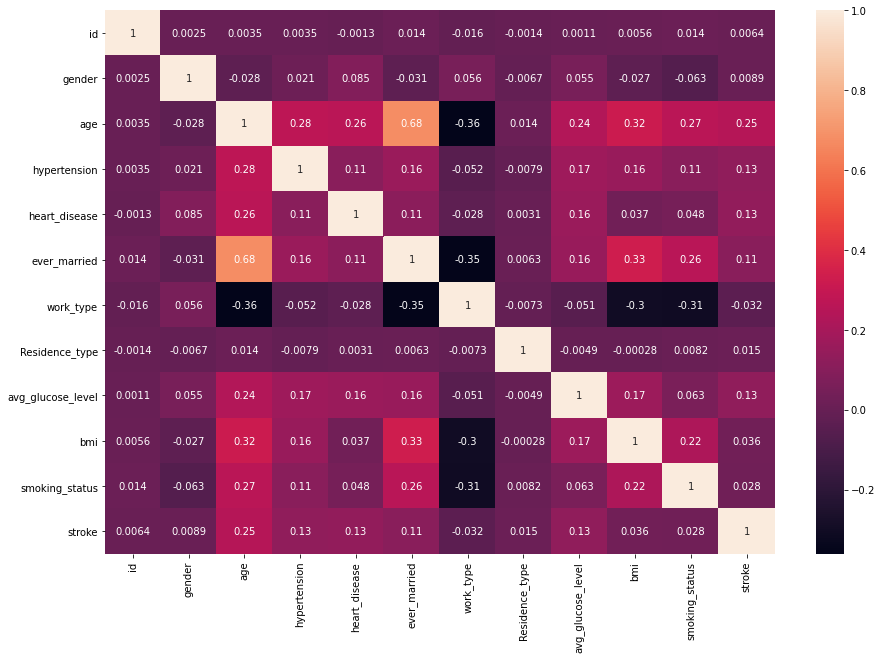

In [16]:
#IN THIS WE ARE FINDING THE CORRELATION OF COLUMN FOR FEATURE SCALING 

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

IN THE ABOVE FIGURE THERE IS NO COLUMN THAT HAVE HIGHLY CORRELATION OR LESS CORRELATION

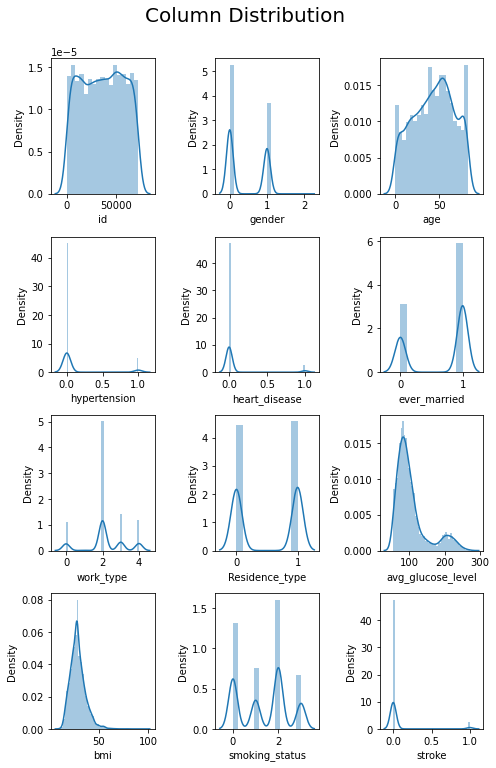

In [17]:
#IN THIS WE ARE CHECKING THAT OUR DATA IS NORMAL DISTRIBUTIVE OR NOT 

list1=list(df.columns)
plt.figure(figsize=(7,30))
for i,column in enumerate(list1):
    plt.subplot(len(list1), 3, i+1)
    plt.suptitle("Column Distribution ", fontsize=20, x=0.5, y=1)
    sns.distplot(df[column])
    plt.tight_layout()

AS WE ARE SEEING IN ABOVE DISTPLOT THERE ARE SOME NORMAL  DISTRIBUTION AND SOME ARE SKEWED DATA 

# FEATURE SELECTION

In [18]:
#IN THIS WE ARE DOING FEATURE SELECTION FOR TAKING IMPORTANT FEATURE FROM DATASET ON THE BASIS OF VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif_data.sort_values('VIF',ascending=False)

,feature,VIF
9,bmi,11.856659
2,age,10.229921
8,avg_glucose_level,6.749179
5,ever_married,5.725357
6,work_type,4.016478
0,id,3.660132
10,smoking_status,2.966829
7,Residence_type,1.977756
1,gender,1.705827
3,hypertension,1.209210


AS WE ARE SEEING IN OUR ABOVE TABLE BMI AND AGE HAVE HIGH VARIANCE

In [19]:
#IN THIS WE ARE DOING OLS MODEL FOR FEATURE SELECTION OM THE BASIS OF P VALUE  

import statsmodels.api as sm
import statsmodels.formula.api as smf
olsmodel = smf.ols(formula='stroke~id+gender+age+hypertension+heart_disease+ever_married+work_type+Residence_type+avg_glucose_level+bmi+smoking_status',data=df).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     41.09
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           4.84e-86
Time:                        05:55:53   Log-Likelihood:                 813.83
No. Observations:                5110   AIC:                            -1604.
Df Residuals:                    5098   BIC:                            -1525.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0687      0.018     -3.862      0.000      -0.104      -0.034
id                 7.451e-08   1.37e-07      0.545      0.585   -1.93e-07    3.42e-07
gender                0.0003      0.006      0.051      0.959      -0.011       0.012
age                   0.0027      0.000     14.155      0.000       0.002       0.003
hypertension          0.0399      0.010      3.884      0.000       0.020       0.060
heart_disease         0.0532      0.013      3.947      0.000       0.027       0.080
ever_married         -0.0367      0.009     -4.303      0.000      -0.053      -0.020
work_type             0.0063      0.003      2.107      0.035       0.000       0.012
Residence_type        0.0056      0.006      0.965      0.334      -0.006       0.017
avg_glucose_level     0.0003    6.7e-05      4.791      0.000       0.000       0.000
bmi                  -0.0010      0.000     -2.448      0.014      -0.002      -0.000
smoking_status       -0.0043      0.003     -1.482      0.138      -0.010       0.001
==============================================================================
Omnibus:                     3820.813   Durbin-Watson:                   0.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48174.732
Skew:                           3.667   Prob(JB):                         0.00
Kurtosis:                      16.133   Cond. No.                     2.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

IN THIS ABOUVE TABLE WE CAN EASILY FIND THE IMPORTANT FEATURE WITH THE HELP OF P COLUMN

In [21]:
# AFTER SEEING THE VIF AND OLS MODEL WE CAN EASILY REMOVE TWO FEATURE THAT ARE VERY LESS IMPORTANT ID AND GENDER

df.drop('id',axis=1,inplace=True)
df.drop('gender',axis=1,inplace=True)

# PREPARING DATA FOR TRAINING THE MODEL

In [22]:
#IN THIS WE ARE SEPERATING THE DATA FRAME BY DROPPING THE TARGET FEATURE 

X=df.drop('stroke',axis=1)
Y=df['stroke']
print(X.shape)
print(Y.shape)

(5110, 9)
(5110,)


## STANDARDIZATION

In [23]:
# IH THIS SHELL WE ARE DOING FEATURE SCALING AND CONVERTING THE RANGE OF [-1,1] WITH THE HELP OF StandardScaler()

SS=StandardScaler()
SS.fit_transform(X,Y)

array([[ 1.05143428, -0.32860186,  4.18503199, ...,  2.70637544,
         1.00508597, -0.35178071],
       [ 0.78607007, -0.32860186, -0.2389468 , ...,  2.12155854,
        -0.09898092,  0.58155233],
       [ 1.62639008, -0.32860186,  4.18503199, ..., -0.0050283 ,
         0.47253605,  0.58155233],
       ...,
       [-0.36384151, -0.32860186, -0.2389468 , ..., -0.51144264,
         0.22574463,  0.58155233],
       [ 0.34379639, -0.32860186, -0.2389468 , ...,  1.32825706,
        -0.42370648, -0.35178071],
       [ 0.03420481, -0.32860186, -0.2389468 , ..., -0.46086746,
        -0.34577235, -1.28511375]])

## DIVIDING THE DATA INTO TRAIN AND TEST 

In [24]:
#IN THIS WE ARE PREPARING THE DATA INTO TWO FORM TRAIN AND TEST. TRAIN IS FOR TRAINING THE DATA TEST IS FOR TESTING THE DATA 

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=31)
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(3577, 9)
(1533, 9)
(1533,)
(3577,)


In [30]:
#IN THIS WE ARE USING XGBCLASSIFIER 

Logreg = XGBClassifier()
Logreg.fit(X_train,Y_train)
Y_pred = Logreg.predict(X_test)
accuracy_score(Y_test,Y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
TP = cm[0,0]
TN = cm[0,1]
FP = cm[1,0]
FN = cm[1,1]
print('TP:',TP ,'\nTN:',TN,'\nFP:',FP,'\nFN:', FN)
print('Presicion Score is: ',precision_score(Y_test,Y_pred))
print('Recall score is:',recall_score(Y_test,Y_pred))
print('Accuaracy Score is:',accuracy_score(Y_test,Y_pred))

[06:05:25] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TP: 1444 
TN: 14 
FP: 75 
FN: 0
Presicion Score is:  0.0
Recall score is: 0.0
Accuaracy Score is: 0.9419439008480104


In [31]:
X_test.[]

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4309,53.0,0,0,1,2,1,74.66,29.2,3
4121,79.0,0,0,1,3,1,113.41,35.0,2
1307,25.0,0,0,0,2,0,92.82,24.1,2
3804,50.0,0,0,1,0,1,89.18,34.8,3
1230,56.0,0,0,1,3,1,124.16,23.0,2


# SAVING THE MODEL 

In [26]:
import pickle
pickle.dump(Logreg, open('Brain_stroke.pickle', 'wb'))
Brain_stroke_model = pickle.load(open('Brain_stroke.pickle', 'rb'))

# CONCLUSION


IN THIS WE ARE PERFORMING MANY OPERATION AND AFTER DOING DATA PREPROCESSING WE ARE MAKING 3 ML MODEL AND AFTER COMPARING THE ACCURACY OF 3 MODEL WE CAN GET XGBCLASSIFIER HAVE HIGH ACCURACY 